In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Load customer transaction data first
transa = pd.read_csv('QVI_transaction_data.csv')

transa.head()


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [3]:

transa.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [4]:
#checking of null values

transa.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [5]:

transa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [6]:
#counting the columns

transa.count()

DATE              264836
STORE_NBR         264836
LYLTY_CARD_NBR    264836
TXN_ID            264836
PROD_NBR          264836
PROD_NAME         264836
PROD_QTY          264836
TOT_SALES         264836
dtype: int64

In [7]:
#check duplicate values

print(transa.duplicated().sum())

1


In [8]:
#removing dupicate value

transa = transa.drop_duplicates()

print(transa.duplicated().sum())

0


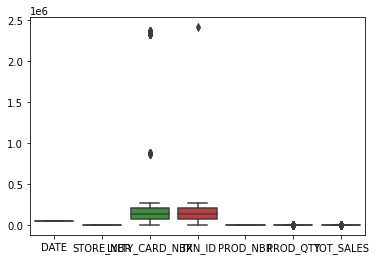

In [9]:
#checking of outliers

sns.boxplot(data=transa)
plt.show()

In [10]:

# Romovind outliers by Setting Tukey's Fences for both columns
Q1_col1 = transa['LYLTY_CARD_NBR'].quantile(0.25)
Q3_col1 = transa['LYLTY_CARD_NBR'].quantile(0.75)
IQR_col1 = Q3_col1 - Q1_col1

lower_bound_col1 = Q1_col1 - 1.5 * IQR_col1
upper_bound_col1 = Q3_col1 + 1.5 * IQR_col1

Q1_col2 = transa['TXN_ID'].quantile(0.25)
Q3_col2 = transa['TXN_ID'].quantile(0.75)
IQR_col2 = Q3_col2 - Q1_col2

lower_bound_col2 = Q1_col2 - 1.5 * IQR_col2
upper_bound_col2 = Q3_col2 + 1.5 * IQR_col2

# Remove outliers from both columns
data_no_outliers = transa[
    (transa['LYLTY_CARD_NBR'] >= lower_bound_col1) & (transa['LYLTY_CARD_NBR'] <= upper_bound_col1) &
    (transa['TXN_ID'] >= lower_bound_col2) & (transa['TXN_ID'] <= upper_bound_col2)
]

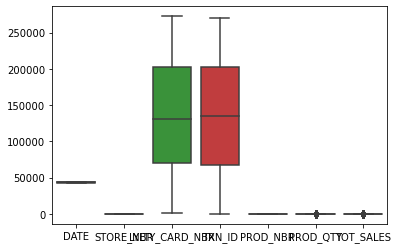

In [11]:
sns.boxplot(data = data_no_outliers)
plt.show()

In [12]:
new_transac = data_no_outliers

In [13]:
new_transac.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [14]:
#Grouping categorical and numerical data

col_counts = dict(new_transac.count(axis=0))
col_types = {c: d for c, d in dict(new_transac.dtypes).items()   if col_counts[c] > 10 }
_is_num = lambda x: x in (np.int64, float)
# separate them
cols_numerical = sorted([col for col, dtp in col_types.items() if _is_num(dtp)])
cols_string = sorted([col for col, dtp in col_types.items() if not _is_num(dtp)])
print(f"NUMERICAL: {cols_numerical}")
print(f"CATEGORICAL: {cols_string}")

NUMERICAL: ['DATE', 'LYLTY_CARD_NBR', 'PROD_NBR', 'PROD_QTY', 'STORE_NBR', 'TOT_SALES', 'TXN_ID']
CATEGORICAL: ['PROD_NAME']


In [15]:
#read purchase_behavior of customers

behavior = pd.read_csv('QVI_purchase_behaviour.csv')

behavior.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [16]:
behavior.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [17]:
behavior.count()

LYLTY_CARD_NBR      72637
LIFESTAGE           72637
PREMIUM_CUSTOMER    72637
dtype: int64

In [18]:
behavior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [19]:
#checking null values

behavior.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

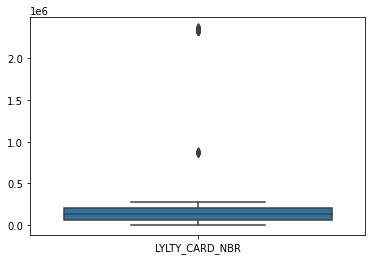

In [23]:
#Checking outliers

sns.boxplot(data = behavior)
plt.show()

In [27]:
# Set Tukey's Fences for the outlier columns to remove outliers 


Q1 = behavior['LYLTY_CARD_NBR'].quantile(0.25)
Q3 = behavior['LYLTY_CARD_NBR'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
behavior_no_outliers = behavior[(behavior['LYLTY_CARD_NBR'] >= lower_bound) & (behavior['LYLTY_CARD_NBR'] <= upper_bound)]

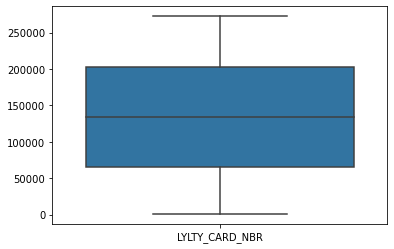

In [28]:
#checking of no_outliers by visualization

sns.boxplot(data =behavior_no_outliers)
plt.show()

In [29]:
new_behavior = behavior_no_outliers

In [30]:
#checking to see if the JOIN KEY column is having same data type

print(new_transac['LYLTY_CARD_NBR'].dtype)
print(new_behavior['LYLTY_CARD_NBR'].dtype)



int64
int64


In [31]:
merged_df = pd.merge(new_behavior,new_transac, on='LYLTY_CARD_NBR', how='inner' )
merged_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,43390,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1002,YOUNG SINGLES/COUPLES,Mainstream,43359,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7
2,1003,YOUNG FAMILIES,Budget,43531,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6
3,1003,YOUNG FAMILIES,Budget,43532,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0
4,1004,OLDER SINGLES/COUPLES,Mainstream,43406,1,5,96,WW Original Stacked Chips 160g,1,1.9


In [32]:
#separating data and time

merged_df['DATE'] = pd.to_datetime(merged_df['DATE'], format='%Y-%m-%d')

# Convert the DateTimeColumn to datetime format
merged_df['DATE'] = pd.to_datetime(merged_df['DATE'])

# Split the datetime column into separate date and time columns
merged_df['Date'] = merged_df['DATE'].dt.date
merged_df['Time'] = merged_df['DATE'].dt.time

In [33]:
merged_df['DATE'].dtype

dtype('<M8[ns]')

In [34]:
merged_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Date,Time
0,1000,YOUNG SINGLES/COUPLES,Premium,1970-01-01 00:00:00.000043390,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,1970-01-01,00:00:00.000043
1,1002,YOUNG SINGLES/COUPLES,Mainstream,1970-01-01 00:00:00.000043359,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,1970-01-01,00:00:00.000043
2,1003,YOUNG FAMILIES,Budget,1970-01-01 00:00:00.000043531,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,1970-01-01,00:00:00.000043
3,1003,YOUNG FAMILIES,Budget,1970-01-01 00:00:00.000043532,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,1970-01-01,00:00:00.000043
4,1004,OLDER SINGLES/COUPLES,Mainstream,1970-01-01 00:00:00.000043406,1,5,96,WW Original Stacked Chips 160g,1,1.9,1970-01-01,00:00:00.000043


In [35]:
#romoving time

merged_df = merged_df.drop(['DATE','Time'], axis=True)

In [36]:
# Reducing the len of LIFESTAGE column values for easy visualization
replacement_dict = {'YOUNG SINGLES/COUPLES': 'YSC', 'MIDAGE SINGLES/COUPLES': 'MSC', 'OLDER SINGLES/COUPLES': 'OSC', 
                    'RETIREES': 'R', 'OLDER FAMILIES': 'OF', 'YOUNG FAMILIES': 'YF', 'NEW FAMILIES': 'NF'
                    }
merged_df['LIFESTAGE'] = merged_df['LIFESTAGE'].replace(replacement_dict)

# Display the resulting DataFrame
merged_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Date
0,1000,YSC,Premium,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,1970-01-01
1,1002,YSC,Mainstream,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,1970-01-01
2,1003,YF,Budget,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,1970-01-01
3,1003,YF,Budget,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,1970-01-01
4,1004,OSC,Mainstream,1,5,96,WW Original Stacked Chips 160g,1,1.9,1970-01-01


In [37]:
#checking total sales made

merged_df['TOT_SALES'].sum()

1934070.3000000003

In [38]:
#checking sales made according to dates provided


# Group by Date and sum the sales
sales_by_date = merged_df.groupby('Date')['TOT_SALES'].sum().reset_index()

# Display the result
print(sales_by_date)

         Date  TOT_SALES
0  1970-01-01  1934070.3


I never assume all data was a single day sales

In [39]:
# Group by 'PROD_NAME' and sum the 'SALES' for each product
total_sales_per_product = merged_df.groupby('PROD_NAME')['TOT_SALES'].sum().reset_index()

# Display the result
print(total_sales_per_product)

                                  PROD_NAME  TOT_SALES
0                         Burger Rings 220g     6828.7
1                  CCs Nacho Cheese    175g     5961.9
2                         CCs Original 175g     6048.0
3                  CCs Tasty Cheese    175g     6069.0
4            Cheetos Chs & Bacon Balls 190g     9243.3
..                                      ...        ...
109  WW Sour Cream &OnionStacked Chips 160g     5323.8
110     WW Supreme Cheese   Corn Chips 200g     5390.3
111          Woolworths Cheese   Rings 190g     5169.6
112          Woolworths Medium   Salsa 300g     4050.0
113          Woolworths Mild     Salsa 300g     4234.5

[114 rows x 2 columns]


In [40]:
#Counting total sales with each of the LIFESTAGE


merged_df['LIFESTAGE'].value_counts()

OSC    54463
R      49756
OF     48589
YF     43586
YSC    36372
MSC    25105
NF      6919
Name: LIFESTAGE, dtype: int64

total number of customers according to their life stage, Older/Single Couples tends to have the larger number of customers, and 
new families had the least.
Old single couples are targeted customers, followed by Retirees, probably the products fits in for old age people

In [41]:
# Group by 'LIFESTAGE' and sum the 'SALES' for each product
total_sales_per_LIFESTAGE = merged_df.groupby('LIFESTAGE')['TOT_SALES'].sum().reset_index()

# Display the result
print(total_sales_per_LIFESTAGE)

  LIFESTAGE  TOT_SALES
0       MSC  184714.60
1        NF   50433.45
2        OF  353710.00
3       OSC  402316.55
4         R  366422.30
5        YF  316110.50
6       YSC  260362.90


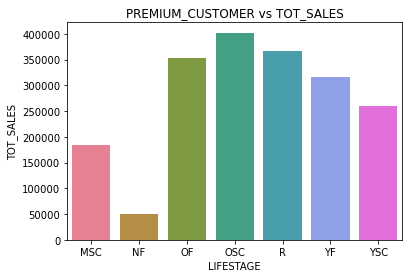

In [42]:
totals = ['TOT_SALES']
for total in totals:
    sns.barplot(data= total_sales_per_LIFESTAGE, x='LIFESTAGE', y=total, palette='husl').set(xlabel = 'LIFESTAGE', ylabel = total, title = f"PREMIUM_CUSTOMER vs {total}")
    plt.show()

As shown above, Old Single Couple, Retirees,Old Families in that order made the highest purchase, products are very essential to old people 

<AxesSubplot:xlabel='LIFESTAGE', ylabel='count'>

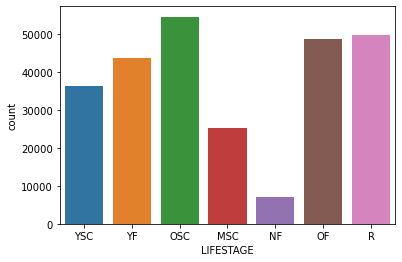

In [43]:
sns.countplot(data = merged_df, x='LIFESTAGE')

the visualization of the number of customers according to the LIFESTAGE

This is of no shocking as old people make more sales to young people.
Old Single Couple tend to make more sales and New Families tend to make less sales.

In [44]:
total_sales_per_Premium_customer = merged_df.groupby('PREMIUM_CUSTOMER').aggregate({'TOT_SALES':'mean'}).reset_index()
total_sales_per_Premium_customer

,PREMIUM_CUSTOMER,TOT_SALES
0,Budget,7.258903
1,Mainstream,7.361040
2,Premium,7.281440


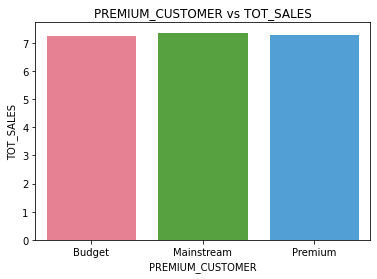

In [45]:
totals = ['TOT_SALES']
for total in totals:
    sns.barplot(data= total_sales_per_Premium_customer, x='PREMIUM_CUSTOMER', y=total, palette='husl').set(xlabel = 'PREMIUM_CUSTOMER', ylabel = total, title = f"PREMIUM_CUSTOMER vs {total}")
    plt.show()

if more target is made on premium customers, they can purchase more than Mainstream.
they had less number than mainstream which appered to posses highest customer rate, yet the purchasing power isnt quite wide.

<AxesSubplot:xlabel='PREMIUM_CUSTOMER', ylabel='count'>

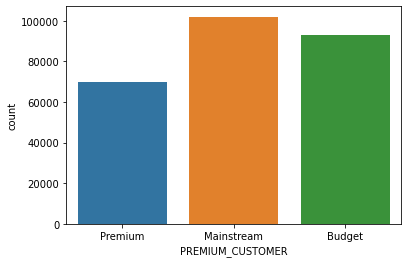

In [46]:
sns.countplot(data = merged_df, x='PREMIUM_CUSTOMER')

Its no shocking, Mainstream provide the highest number of customers and also made the highest purchase.

                                   PROD_NAME  TOT_SALES
11          Dorito Corn Chp     Supreme 380g    40326.0
86    Smiths Crnkle Chip  Orgnl Big Bag 380g    36355.8
77  Smiths Crinkle Chips Salt & Vinegar 330g    34781.4
33    Kettle Mozzarella   Basil & Pesto 175g    34430.4
76         Smiths Crinkle      Original 330g    34302.6


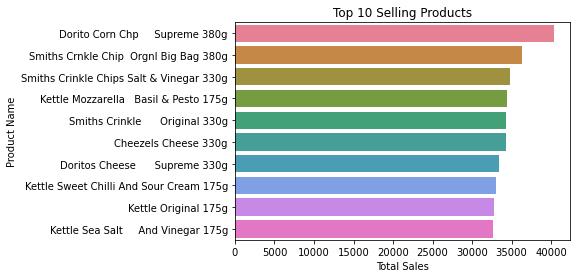

In [47]:
# Group by 'PROD_NAME' and sum the 'SALES' for each product
total_sales_per_product = merged_df.groupby('PROD_NAME')['TOT_SALES'].sum().reset_index()

# Sort by total sales in descending order
top_selling_products = total_sales_per_product.sort_values(by='TOT_SALES', ascending=False)

# Display the top-selling products
print(top_selling_products.head())

# visualize the results

sns.barplot(data=top_selling_products.head(10), x='TOT_SALES', y='PROD_NAME', palette='husl')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.title('Top 10 Selling Products')
plt.show()

Looking into the top 10 most sold products, I realized that 'Dorito Corn Chp     Supreme 380g' made the most sales.
This will help decide which products to purchase more into stock, meaning, from the previos analysis on LIFESTAGE, I can boldy say these are items for the aged people

                                   PROD_NAME  PROD_QTY
11          Dorito Corn Chp     Supreme 380g      6505
33    Kettle Mozzarella   Basil & Pesto 175g      6376
42  Kettle Tortilla ChpsHny&Jlpno Chili 150g      6309
8             Cobs Popd Sea Salt  Chips 110g      6277
10  Cobs Popd Swt/Chlli &Sr/Cream Chips 110g      6254


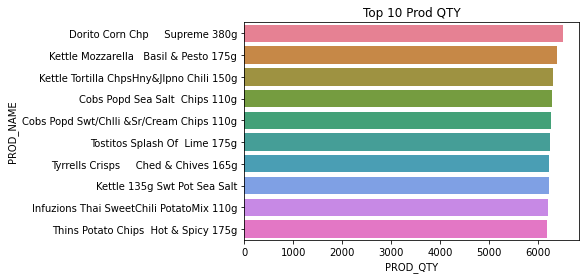

In [48]:
# Group by 'PROD_NAME' and sum the 'QTY' for each product
top_product_quantitity = merged_df.groupby('PROD_NAME')['PROD_QTY'].sum().reset_index()

# Sort by total sales in descending order
top_product_quantitity= top_product_quantitity.sort_values(by='PROD_QTY', ascending=False)

# Display the top-selling products
print(top_product_quantitity.head())

#visualize the results

sns.barplot(data=top_product_quantitity.head(10), x='PROD_QTY', y='PROD_NAME', palette='husl')
plt.xlabel('PROD_QTY')
plt.ylabel('PROD_NAME')
plt.title('Top 10 Prod QTY')
plt.show()

These are the top 10 products with high stock, I can confidently suggest product like 'Smiths Crnkle Chip  Orgnl Big Bag' and 'Smiths Crinkle Chips Salt & Vinegar' 
should be store more since it stands to have high sales

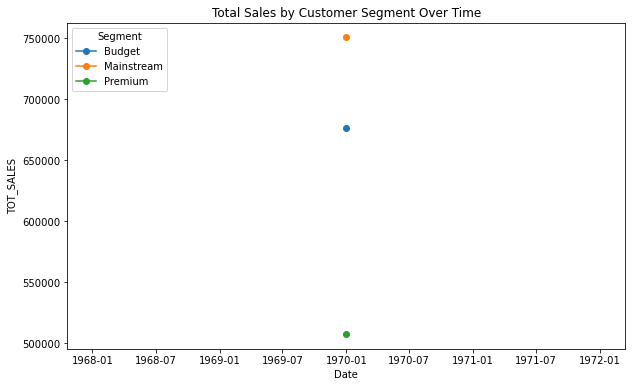

In [49]:


# Group by Date and Segment to get total sales for each segment on each date
grouped_df = merged_df.groupby(['Date', 'PREMIUM_CUSTOMER']).agg({'TOT_SALES': 'sum'}).reset_index()

# Pivot the table for easy plotting
pivot_df = grouped_df.pivot(index='Date', columns='PREMIUM_CUSTOMER', values='TOT_SALES').fillna(0)

# Plot the data
pivot_df.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Total Sales by Customer Segment Over Time')
plt.xlabel('Date')
plt.ylabel('TOT_SALES')
plt.legend(title='Segment', loc='upper left')
plt.show()

In [50]:
cor_matrix=merged_df.corr()
cor_matrix

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
LYLTY_CARD_NBR,1.000000,0.999947,0.999631,0.002334,0.005147,0.003179
STORE_NBR,0.999947,1.000000,0.999574,0.002331,0.005257,0.003206
TXN_ID,0.999631,0.999574,1.000000,0.002387,0.005395,0.003375
PROD_NBR,0.002334,0.002331,0.002387,1.000000,-0.004780,-0.133820
PROD_QTY,0.005147,0.005257,0.005395,-0.004780,1.000000,0.715320
TOT_SALES,0.003179,0.003206,0.003375,-0.133820,0.715320,1.000000


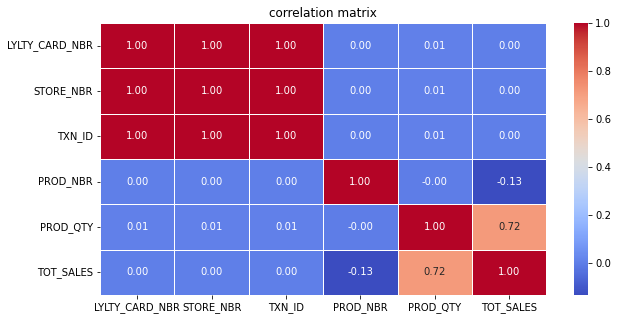

In [51]:
plt.figure(figsize=(10,5))
sns.heatmap(cor_matrix, annot = True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('correlation matrix')
plt.show()

<AxesSubplot:xlabel='PROD_QTY', ylabel='TOT_SALES'>

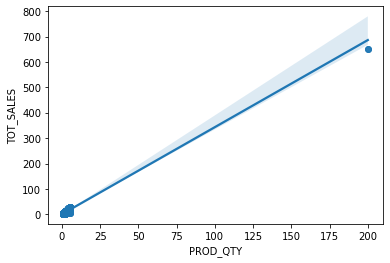

In [52]:
#comparing Grade 1 and Grade 2

sns.regplot(x="PROD_QTY", y="TOT_SALES", data=merged_df)

<AxesSubplot:xlabel='PROD_QTY', ylabel='TOT_SALES'>

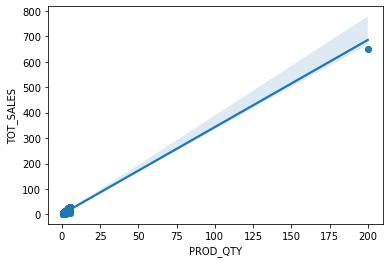

In [55]:
sns.regplot(x="PROD_QTY", y="TOT_SALES", data=merged_df)

In [56]:
merged_df.tail()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Date
264785,272391,YSC,Mainstream,272,270205,63,Kettle 135g Swt Pot Sea Salt,2,8.4,1970-01-01
264786,272392,MSC,Premium,272,270206,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,1970-01-01
264787,272392,MSC,Premium,272,270207,75,Cobs Popd Sea Salt Chips 110g,2,7.6,1970-01-01
264788,272392,MSC,Premium,272,270208,81,Pringles Original Crisps 134g,2,7.4,1970-01-01
264789,272392,MSC,Premium,272,270209,78,Thins Chips Salt & Vinegar 175g,2,6.6,1970-01-01


Recommendations for Category Management:

1. Optimize Stock for Top-Selling Products:

Allocate more stock for the top-selling products, especially 'Dorito Corn Chp Supreme 380g', 'Smiths Crnkle Chip  Orgnl Big Bag'. These items have consistently demonstrated high sales and should be prioritized in inventory management.

2. Target Old Single Couples,Old Families and Retirees:

Tailor marketing strategies and promotions to target Old Single Couples,Old Families and Retirees. They represent the largest customer base and have shown a preference for purchasing essential products. Consider bundling or promotions that cater specifically to their needs.

3. Premium Customer Focus:

Shift marketing efforts towards Premium customers. While Mainstream customers dominate in numbers, Premium customers exhibit higher purchasing power. Implement loyalty programs or exclusive offers to encourage repeat purchases from Premium customers.

4.Age-Specific Product Selection:

Acknowledge the age-specific preferences reflected in the data. Consider expanding the product range for items that appeal to older demographics, ensuring a diverse selection that aligns with the preferences of Old Single Couples, Old Families and Retirees.

5. Monitor Purchase Trends by Life Stage:

Continuously monitor and analyze purchase trends based on life stages. This ongoing analysis will help adapt strategies as customer preferences evolve over time.

6. Data-Driven Decision-Making:

Emphasize the importance of data-driven decision-making in category management. Regularly review sales data, customer demographics, and product performance to refine strategies and maximize profitability.
Inventory Management for High-Turnover Products:

Implement efficient inventory management practices for high-turnover products. Maintain adequate stock levels for consistently popular items like 'Smiths Crnkle Chip Orgnl Big Bag' and 'Smiths Crinkle Chips Salt & Vinegar' to meet customer demand.

7. Explore Collaborations and Promotions:

Explore collaborations or joint promotions with brands or products that resonate with the identified customer segments. Cross-promotions can drive additional sales and enhance the overall customer experience.

8.Enhance Premium Customer Experience:

Focus on enhancing the shopping experience for Premium customers. Provide personalized recommendations, exclusive discounts, or VIP access to new products to increase their engagement and loyalty.

9. Strategic Marketing Campaigns:

Develop targeted marketing campaigns that speak directly to the preferences and needs of Old Single Couples,Old and Retirees or in summary old age people. Use demographic insights to create compelling messaging that resonates with these customer segments.
